# Topic Modeling using LDA and NMF

This notebook applies topic modeling techniques on the classic "20 Newsgroups" dataset using two popular unsupervised learning algorithms:

- **Latent Dirichlet Allocation (LDA)**
- **Non-Negative Matrix Factorization (NMF)**

The goal is to extract 10 distinct topics from the text corpus, display their key terms, and visualise them with wordclouds.


In [1]:
# Step 1: Import libraries
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud

# For preprocessing
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize

nltk.download('stopwords')
stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##Dataset Loading

We use the `newsgroups` dataset provided by the course. The file is uploaded manually into Google Colab using the `files.upload()` method. It is stored in Pickle format and contains unstructured text documents.


In [9]:
from google.colab import files
uploaded = files.upload()


Saving newsgroups to newsgroups (1)


In [10]:
# Step 2: Load the dataset
with open('/content/newsgroups', 'rb') as f:  # Remplace ce chemin si besoin
    newsgroup_data = pickle.load(f)

print("Number of documents:", len(newsgroup_data))
print("First example:\n", newsgroup_data[0])


Number of documents: 2000
First example:
 The best group to keep you informed is the Crohn's and Colitis Foundation
of America.  I do not know if the UK has a similar organization.  The
address of
the CCFA is 

CCFA
444 Park Avenue South
11th Floor
New York, NY  10016-7374
USA

They have a lot of information available and have a number of newsletters.
 
Good Luck.


##Text Preprocessing

We clean the text by:
- Lowercasing
- Removing non-alphabetical characters and digits
- Removing stopwords
- Filtering out short tokens

This step ensures the quality of the tokens before vectorization.


In [11]:
# Step 3: Simple preprocessing
import re

def clean_text(doc):
    doc = doc.lower()
    doc = re.sub(r'\W+', ' ', doc)  # remove non-word characters
    doc = re.sub(r'\d+', '', doc)  # remove digits
    tokens = [w for w in doc.split() if w not in stop_words and len(w) > 2]
    return ' '.join(tokens)

corpus_cleaned = [clean_text(doc) for doc in newsgroup_data]


##Text Vectorization

To apply topic modeling, we need to transform the cleaned text into a numerical representation:

- For **LDA**, we use `CountVectorizer` (frequency-based)
- For **NMF**, we use `TfidfVectorizer` (weight-based)

We limit max_df and min_df to reduce noise and improve topic coherence.


In [12]:
# Step 4: Vectorize text
# LDA => CountVectorizer
vectorizer_lda = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_lda = vectorizer_lda.fit_transform(corpus_cleaned)

# NMF => TfidfVectorizer
vectorizer_nmf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_nmf = vectorizer_nmf.fit_transform(corpus_cleaned)


##Topic Modeling (LDA and NMF)

We apply both LDA and NMF with `n_components = 10` (i.e., we want to extract 10 topics). Each model identifies topic-word distributions.


In [13]:
# Step 5: Apply LDA and NMF
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_model.fit(X_lda)

nmf_model = NMF(n_components=10, random_state=42)
nmf_model.fit(X_nmf)


/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF(n_components=10, random_state=42)

##Top Words per Topic

For each topic extracted by LDA and NMF, we display the 10 most representative words. These words help us interpret what each topic is about.


In [14]:
# Step 6: Display top 10 words per topic
def display_topics(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print("")

print("=== LDA Topics ===")
display_topics(lda_model, vectorizer_lda.get_feature_names_out())

print("=== NMF Topics ===")
display_topics(nmf_model, vectorizer_nmf.get_feature_names_out())


=== LDA Topics ===
Topic #1:
space, mail, thanks, nasa, data, edu, mac, available, information, scsi

Topic #2:
know, think, like, people, time, problem, say, pain, car, really

Topic #3:
space, data, april, shuttle, new, nasa, mission, use, know, launch

Topic #4:
drive, disk, card, drives, use, controller, hard, bios, rom, speed

Topic #5:
god, people, atheism, new, think, alt, religion, know, believe, argument

Topic #6:
car, like, pick, time, engine, oil, brake, games, high, probably

Topic #7:
good, year, like, think, people, really, sure, make, years, time

Topic #8:
game, team, like, think, hockey, play, got, games, kings, teams

Topic #9:
cancer, ground, medical, msg, research, center, new, university, current, air

Topic #10:
edu, com, year, car, bike, good, time, like, think, way

=== NMF Topics ===
Topic #1:
time, think, bike, like, good, way, know, people, long, want

Topic #2:
drive, disk, scsi, drives, hard, cable, floppy, problem, power, boot

Topic #3:
pitt, geb, dsl, i

##Visualisation with WordClouds

We visualise the top terms for each topic using WordClouds. This gives a quick and intuitive overview of the content of each topic.


Generating wordcloud for topic 1


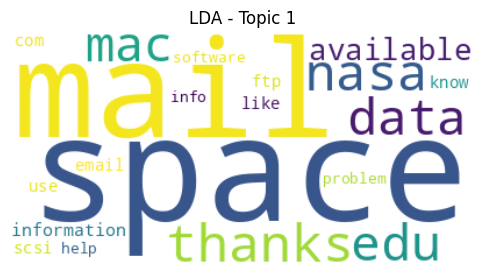

Generating wordcloud for topic 2


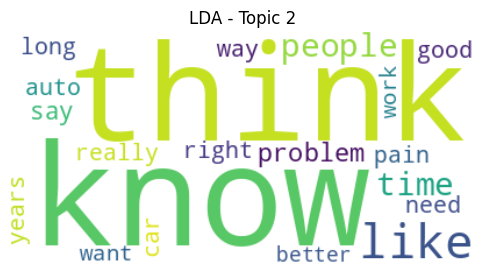

Generating wordcloud for topic 3


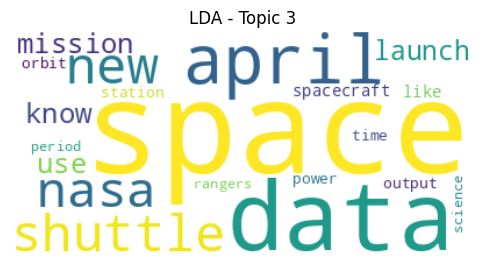

Generating wordcloud for topic 4


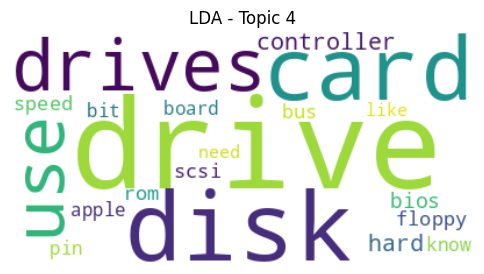

Generating wordcloud for topic 5


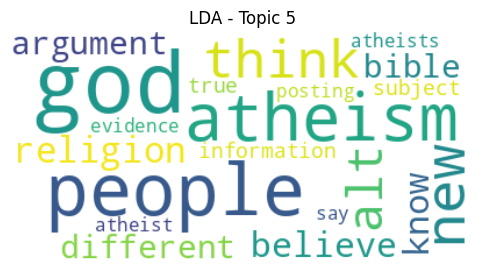

Generating wordcloud for topic 6


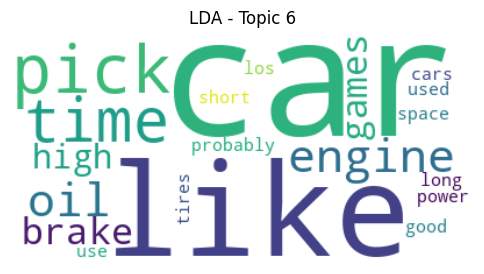

Generating wordcloud for topic 7


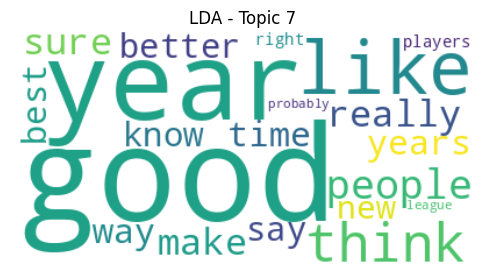

Generating wordcloud for topic 8


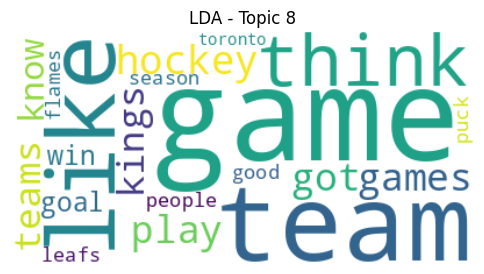

Generating wordcloud for topic 9


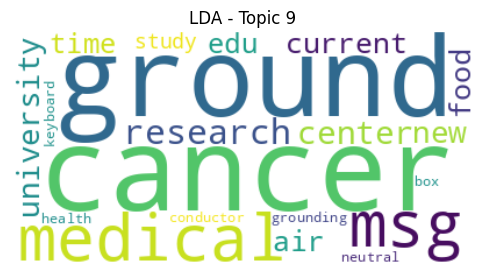

Generating wordcloud for topic 10


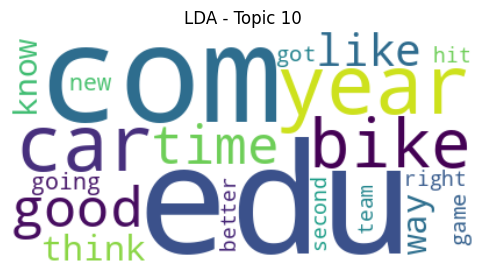

Generating wordcloud for topic 1


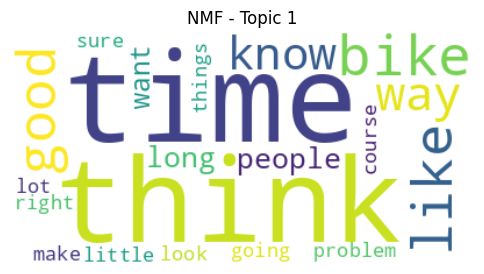

Generating wordcloud for topic 2


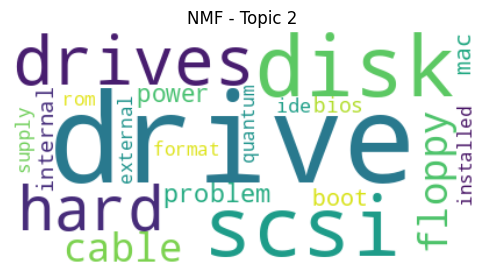

Generating wordcloud for topic 3


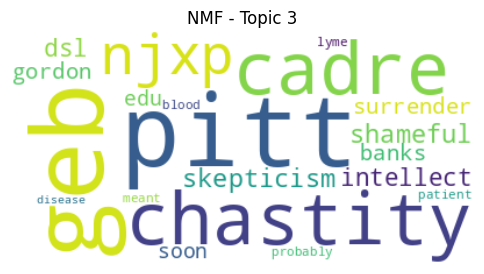

Generating wordcloud for topic 4


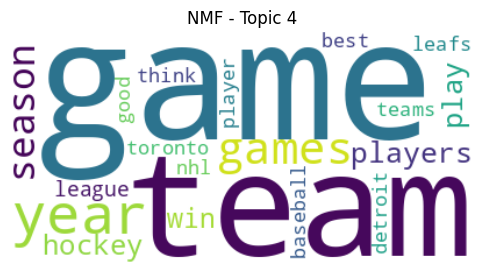

Generating wordcloud for topic 5


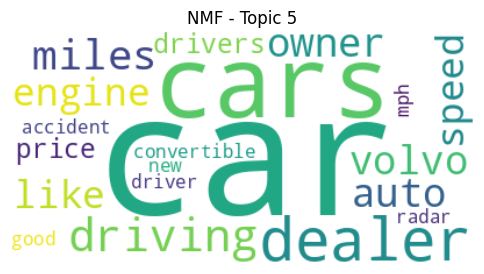

Generating wordcloud for topic 6


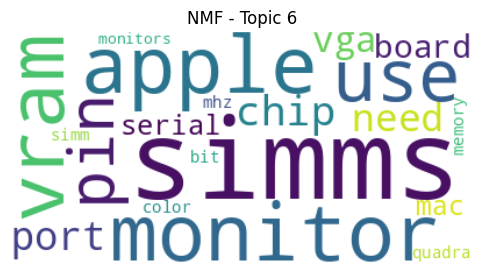

Generating wordcloud for topic 7


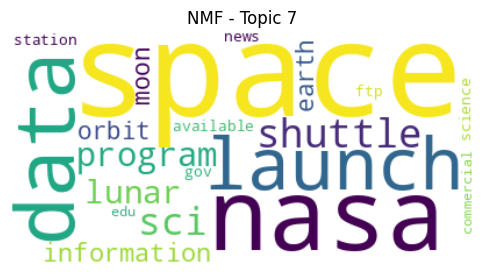

Generating wordcloud for topic 8


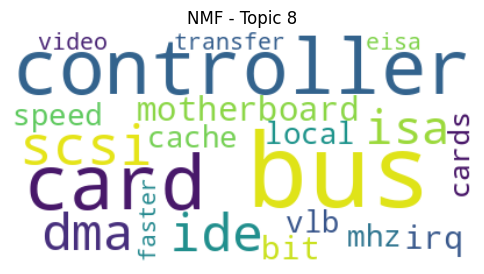

Generating wordcloud for topic 9


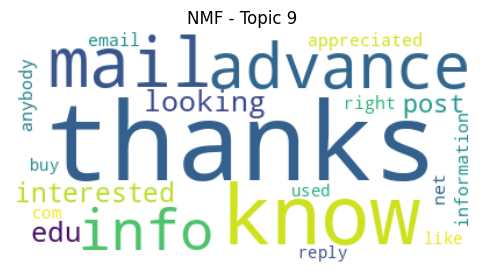

Generating wordcloud for topic 10


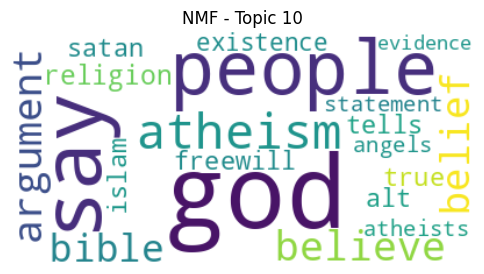

In [15]:
# Step 7: Wordcloud per topic
def plot_wordclouds(model, feature_names, title):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Generating wordcloud for topic {topic_idx + 1}")
        word_freq = {feature_names[i]: topic[i] for i in topic.argsort()[-20:]}
        wc = WordCloud(background_color='white').generate_from_frequencies(word_freq)
        plt.figure(figsize=(6,4))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'{title} - Topic {topic_idx + 1}')
        plt.show()

plot_wordclouds(lda_model, vectorizer_lda.get_feature_names_out(), title="LDA")
plot_wordclouds(nmf_model, vectorizer_nmf.get_feature_names_out(), title="NMF")


## Conclusion

- **LDA and NMF** are both useful for uncovering thematic structures in a corpus of unlabelled text.
- The extracted topics show meaningful patterns — some related to technology, politics, or science (depending on the dataset).
- LDA relies on a probabilistic model, while NMF uses matrix factorisation. Comparing both helps understand different perspectives on the same corpus.

This analysis demonstrates how unsupervised models can help structure large unlabelled textual datasets.
